### Data Science Nanodegree - A Data Science Blog Post 

I have started this project as part of the Data Science Nanodegree program offered by Udacity. 

I have choosen to use the Seattle Airbnb homes data as a start point for my research as to see what are the best criteria when choosing a perfect accommodation and where should a host focus on. The dataset was download from the Kaggle platform and contains 3818 home listings from Seattle, United States. 

In order to complete this project I have used the CRISP-DM method.

### 1. Business Understanding
The data used for this assignment was download from the Kaggle platform, offering insights on the Seattle AirBNB homes data. The main purpose of this project is to offer a high-level overview over the accommodation offer in Seattle by answering the following questions:


##### Questions
1. How can we describe the Seattle accommodation offer?
2. Can we predict the price established for an accommodation based on the facilities listed by the host?
3. What factors seem to have a strong impact in receiving a Superhost badge?

### 2. Data understanding

* Data import 
* Descriptive analysis 
* Quantitative variables study 
* Categorical variables study
* Missing data 

Importing the necessary libraries.

In [438]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

We will just start by importing the data.

In [439]:
df = pd.read_csv('./Database/listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


Checking to see the number of rows and columns.

In [440]:
def df_shape(df):
    rows_no = df.shape[0] 
    columns_no = df.shape[1] 
    print('The Seattle database has',rows_no, 'rows and', columns_no, 'columns.' )

df_shape(df)

The Seattle database has 3818 rows and 92 columns.


In [441]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There are 3816 accomodation listings with a average review score of 94.5. 

We then check for any missing data.

In [442]:
# display the missing data volume for each variable
print(df.isnull().sum())

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64


In [443]:
# display the columns with any missing data
df.columns[df.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')

#### How can we describe the Seattle accommodation offer?

In [444]:
# define a function that considers the proportion of diferent categories from a categorical variable
def data_share(df, var):
    share = var.value_counts()/(df.shape[0] - sum(var.isnull())) *100
    return round(share,3)

In [445]:
# check the list of cities associated with the Seattle accomodation listing
data_share(df, df.city)

Seattle                  99.790
West Seattle              0.052
Seattle                   0.052
Ballard, Seattle          0.026
西雅图                       0.026
Phinney Ridge Seattle     0.026
seattle                   0.026
Name: city, dtype: float64

In [446]:
data_share(df, df['city'].str.upper().str.strip())

SEATTLE                  99.869
WEST SEATTLE              0.052
BALLARD, SEATTLE          0.026
西雅图                       0.026
PHINNEY RIDGE SEATTLE     0.026
Name: city, dtype: float64

The majority of listings is based in Seattle (almost 99.9%), but the offer also includes cities such as Weast Seattle, Ballard or Phinney Ridge.

In [447]:
def barplot_draw(var, df, color, title):
    values = var.value_counts()
    (values/df.shape[0]).plot(kind='bar', color=color);
    plt.title(title);

In [448]:
def pieplot_draw(var, df, title):
    values = var.value_counts()
    (values/df.shape[0]).plot(kind='pie', autopct='%.1f', normalize=False);
    plt.title(title);

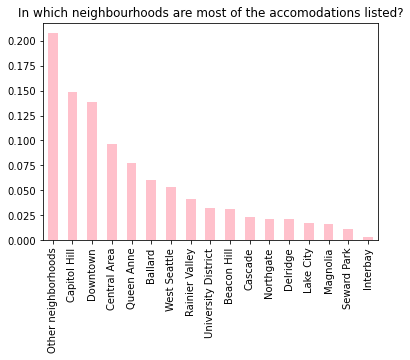

In [449]:
plot_draw(df['neighbourhood_group_cleansed'], df, 'pink', "In which neighbourhoods are most of the accomodations listed?")

As we can see, the most accomodations are based in central neighbourhoods as Capitol Hill, Downtown, Central Area and Queen Anne.

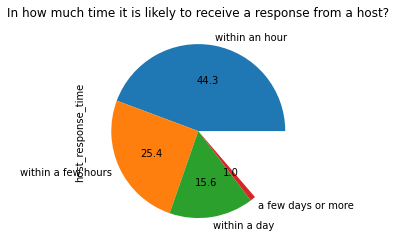

In [450]:
pieplot_draw(df['host_response_time'], df, "In how much time it is likely to receive a response from a host?");

The Seattle AirBNB hosts are more likely to reply to a guest within an hour or maybe a few hours, but just a few of them are replying in a day or more. 

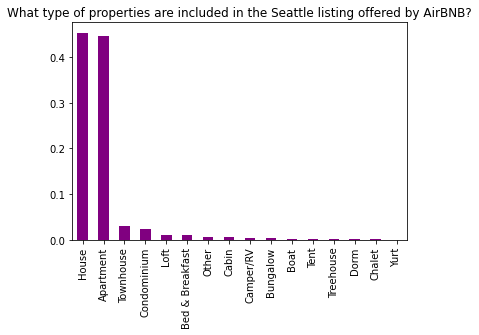

In [451]:
plot_draw(df['property_type'], df, 'purple', "What type of properties are included in the Seattle listing offered by AirBNB?")

On the Airbnb platform are mostly listed houses and apartments, although the Seattle offer includes different types of properties from houses to boats or even yurts. 

In [452]:
def category_group(df, var_by_list, var):
    return pd.DataFrame(df.groupby(var_by_list).mean()[var].round())

In [453]:
category_group(df, 'room_type', 'availability_365')

,availability_365
room_type,
Entire home/apt,233.0
Private room,264.0
Shared room,297.0


A potential guest will have a great chance to find availability for a shared room or even a private room.

In [454]:
category_group(df, 'property_type', ['availability_365', 'number_of_reviews', 'review_scores_rating', 'minimum_nights'])

,availability_365,number_of_reviews,review_scores_rating,minimum_nights
property_type,,,,
Apartment,239.0,21.0,94.0,3.0
Bed & Breakfast,267.0,24.0,96.0,2.0
Boat,284.0,8.0,96.0,1.0
Bungalow,254.0,6.0,98.0,2.0
Cabin,242.0,93.0,96.0,2.0
Camper/RV,263.0,49.0,96.0,2.0
Chalet,333.0,6.0,84.0,2.0
Condominium,211.0,8.0,95.0,2.0
Dorm,213.0,11.0,90.0,1.0


Base on the above summary:
* most of the availability is offered by hosts with proprieties listed as chalets, boats, campers/RVs, on the other side the annual availability is slightly reduced at almost half for tents and yurts
* cabins, campers/RVs and lofts are top 3 in the number of reviews
* the biggest scored are held by properties such as yurts, bungalows and townhouses
* apartment owners are the only ones that require al least 3 nights for renting

In [455]:
category_group(df, ['host_is_superhost', 'room_type'], ['availability_365'])

availability_365
host_is_superhost room_type                        
f                 Entire home/apt             233.0
                  Private room                266.0
                  Shared room                 306.0
t                 Entire home/apt             235.0
                  Private room                256.0
                  Shared room                 209.0

Considering the host and room type, overall the Superhosts have less availability across the entire year.

In [456]:
category_group(df, [df['city'].str.upper().str.strip(), 'room_type'], 'availability_365')

availability_365
city                  room_type                        
BALLARD, SEATTLE      Entire home/apt             289.0
PHINNEY RIDGE SEATTLE Entire home/apt              15.0
SEATTLE               Entire home/apt             234.0
                      Private room                264.0
                      Shared room                 297.0
WEST SEATTLE          Private room                362.0
西雅图                   Private room                171.0

#### What factors seem to have a strong impact in receiving a Superhost badge?

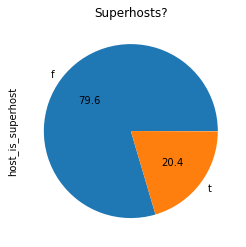

In [457]:
# check the share of Superhosts in the Seattle AirBNB database
pieplot_draw(df['host_is_superhost'], df, "Superhosts?")

20.4% of the hosts are listed as Superhosts by AirBNB. 

In [458]:
# define a function to characterize the behaviour of a Superhost
def category_query(df, var_by):
    return pd.DataFrame(df.query("host_is_superhost == 't'").groupby(var_by).count()['host_id'])

In [459]:
category_query(df, ['host_is_superhost', 'host_has_profile_pic'])

host_id
host_is_superhost host_has_profile_pic         
t                 f                           1
                  t                         777

In [226]:
category_query(df, ['host_is_superhost', 'host_identity_verified'])

host_id
host_is_superhost host_identity_verified         
t                 f                            75
                  t                           703

In [227]:
category_query(df, ['host_is_superhost', 'host_response_time'])

host_id
host_is_superhost host_response_time         
t                 a few days or more        1
                  within a day             57
                  within a few hours      198
                  within an hour          489

In [228]:
category_query(df, ['host_is_superhost', 'cancellation_policy'])

host_id
host_is_superhost cancellation_policy         
t                 flexible                 142
                  moderate                 301
                  strict                   335

In [229]:
category_query(df, ['host_is_superhost', 'require_guest_profile_picture'])

host_id
host_is_superhost require_guest_profile_picture         
t                 f                                  670
                  t                                  108

In [230]:
category_query(df, ['host_is_superhost', 'require_guest_phone_verification'])

host_id
host_is_superhost require_guest_phone_verification         
t                 f                                     654
                  t                                     124

In [118]:
category_query(df, ['host_is_superhost', 'property_type'])

host_id
host_is_superhost property_type           
t                 Apartment            319
                  Bed & Breakfast        8
                  Bungalow               1
                  Cabin                 14
                  Camper/RV              4
                  Condominium           14
                  House                381
                  Loft                  11
                  Other                  2
                  Townhouse             22
                  Treehouse              1
                  Yurt                   1

In [430]:
category_query(df, ['host_is_superhost', 'has_availability'])

,,host_id
host_is_superhost,has_availability,
t,t,728


In [232]:
category_query(df, ['host_is_superhost', 'instant_bookable'])

host_id
host_is_superhost instant_bookable         
t                 f                     612
                  t                     166

#### Conclusion

Studying the data on Superhosts characteristics, we can state that:

* almost all hosts shared a profile picture with all AirBNB users 
* the majority of them has been verified and certified on the AirBNB platform 
* the guests are likely to receive a reply from a Superhost in within an hour or perhaps a few hours the most (just a few of them take more than a day to offer a response)
* most of the hosts impose a strict or moderate cancellation policy
* for the biggest part of the Superhosts, the guest are not required a profile picture or a phone verification as a prerequisite for the validation of the accomodation
* in the matter of properties type, most of the accomodation listed by Superhosts are categorized as houses or apartments
* there is a large variety of accommodations offered by Superhosts from houses to treehouses of even bungalow
* all the Superhosts are marked with availability for renting
* although available, most of the Superhosts accomodations are not listed as instant bookable

### 3. Data Preparation

* Data formatting
* Missing data handeling 
* Duplicate data wrangling
* Outliers filtering

First, check data format.

In [460]:
# update the city column - transform to upper character and remove any spaces
df['city'] = df['city'].str.upper().str.strip()
df['city'].unique()

array(['SEATTLE', 'BALLARD, SEATTLE', 'WEST SEATTLE', '西雅图',
       'PHINNEY RIDGE SEATTLE'], dtype=object)

In [461]:
# check variables data types 
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [462]:
# remove the $ sign from the following columns: price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people
def sign_clear(var, sign, var_type):
    return var.replace('[{},]'.format(sign), '', regex = True).astype(var_type)

In [463]:
df[['price','weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']] = sign_clear(df[['price','weekly_price',  'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']], '$', 'float64')

#test
df[['price','weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,85.0,NaN,NaN,NaN,NaN,5.0
1,150.0,1000.0,3000.0,100.0,40.0,0.0
2,975.0,NaN,NaN,1000.0,300.0,25.0
3,100.0,650.0,2300.0,NaN,NaN,0.0
4,450.0,NaN,NaN,700.0,125.0,15.0


In [464]:
df[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']] = sign_clear(df[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']], '%', 'float64')
df[['host_response_rate','host_acceptance_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month']].head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,96.0,100.0,3.0,3.0,4.0,1.0,1.0,1.0,2.0,1.0,...,207.0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,4.07
1,98.0,100.0,6.0,6.0,4.0,1.0,1.0,1.0,1.0,2.0,...,43.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6.0,1.48
2,67.0,100.0,2.0,2.0,11.0,4.5,5.0,7.0,10.0,4.0,...,20.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.15
3,NaN,NaN,1.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,100.0,NaN,2.0,2.0,6.0,2.0,3.0,3.0,6.0,1.0,...,38.0,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,0.89


Checking all the columns by the proportion of missing values.

In [465]:
# check for the column with missing data
missing = set(df.columns[df.isnull().mean() != 0]) 
print('The following columns have at least one missing value:',missing)

The following columns have at least one missing value: {'host_total_listings_count', 'first_review', 'property_type', 'review_scores_accuracy', 'notes', 'space', 'host_listings_count', 'host_has_profile_pic', 'review_scores_rating', 'host_is_superhost', 'host_identity_verified', 'host_response_time', 'host_acceptance_rate', 'beds', 'xl_picture_url', 'neighborhood_overview', 'license', 'bedrooms', 'host_location', 'thumbnail_url', 'security_deposit', 'review_scores_checkin', 'host_since', 'square_feet', 'zipcode', 'medium_url', 'host_thumbnail_url', 'review_scores_cleanliness', 'transit', 'host_picture_url', 'bathrooms', 'neighbourhood', 'reviews_per_month', 'cleaning_fee', 'host_about', 'monthly_price', 'review_scores_value', 'weekly_price', 'host_name', 'host_neighbourhood', 'review_scores_location', 'last_review', 'review_scores_communication', 'summary', 'host_response_rate'}


In [466]:
# get the columns with more than 75% / 50% / 25% missing data
mostly_missing_75 = set(df.columns[df.isnull().mean()>0.75])
mostly_missing_50 = set(df.columns[df.isnull().mean()>0.50])
mostly_missing_25 = set(df.columns[df.isnull().mean()>0.25])
print('The following columns have more than 75% missing values:',mostly_missing_75)
print('The following columns have more than 50% missing values:',mostly_missing_50)
print('The following columns have more than 25% missing values:',mostly_missing_25)

The following columns have more than 75% missing values: {'license', 'square_feet'}
The following columns have more than 50% missing values: {'license', 'monthly_price', 'security_deposit', 'square_feet'}
The following columns have more than 25% missing values: {'monthly_price', 'weekly_price', 'neighborhood_overview', 'notes', 'license', 'cleaning_fee', 'security_deposit', 'square_feet'}


All the columns with more than 50% missing data will be removed from the dataframe.

In [467]:
def missing_data_cleaning(df):
    mostly_missing_50 = (df.columns[df.isnull().mean()>0.50])
    df = df.drop(mostly_missing_50, axis=1) 
    return df

In [468]:
print('Columns before the missing data cleaning: ', df.shape[1])
df = missing_data_cleaning(df)
print('Columns after the missing data cleaning: ', df.shape[1])

Columns before the missing data cleaning:  92
Columns after the missing data cleaning:  88


In [469]:
# check for duplicates in the dataframe
print('There are ', df.duplicated().sum(), ' duplicate values in the dataframe.')

There are  0  duplicate values in the dataframe.


In [470]:
# check for outliers and clean the data
def outlier_clean(df):
   
    for column in df.columns:
        if(df[column].dtype == np.float64):
            outl_df = df[df[column] <= df[column].mean() + 3 * df[column].std()]
    return outl_df

In [471]:
print('Rows before the missing data cleaning: ', df.shape[0])
df = outlier_clean(df)
print('Rows after the missing data cleaning: ', df.shape[0])

Rows before the missing data cleaning:  3818
Rows after the missing data cleaning:  3140


### 4. Data modeling

* Correlation matrix
* Linear Regression
* Decision tree

#### Can we predict the price established for an accommodation based on the facilities listed by the host?

We want to predict the price of an accomodation taking into consideration the following possible independent variables: host_response_rate, host_acceptance_rate, accommodates, bathrooms, bedrooms, beds, guests_included, extra_people, minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, reviews_per_month.

In [472]:
def corr_matrix(var_list):
    corr_mat = sns.heatmap(var_list.corr(), annot=True, fmt=".2f")
    return corr_mat

<AxesSubplot:>

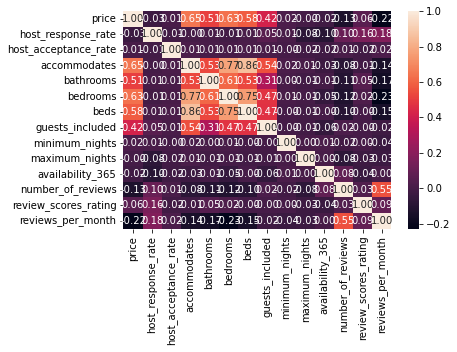

In [473]:
corr_matrix(df[['price','host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',  'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']])

From the previous correlation matrix I have decided to keep only some of the data: accommodates, bathrooms, bedrooms, beds, guests_included, number_of_reviews based on the correlation factor.

<AxesSubplot:>

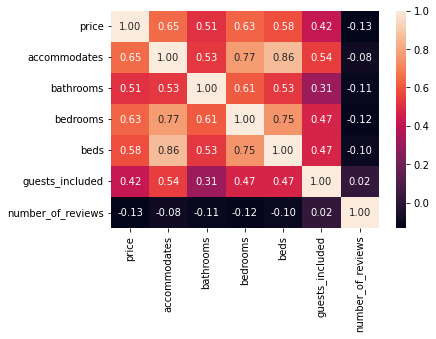

In [474]:
corr_matrix(df[['price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']])

#### Conclusions

* the price goes up with an increase of the property capacity, rooms (bathrooms, bedrooms) and number of beds
* there is a positive correlation between the price of an accomodation and the number of guest included in the reservation
* there is a negative correlation between the price and the number of reviews, so a property with a high number of reviews has a smaller price 

#### Regression Model (considering dropping missing values)

In [544]:
def regression_model(X, y):
    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=13)
    
    #Create the model
    lm_model = LinearRegression(normalize=True)
    
    #Fitt the model
    lm_model.fit(X_train, y_train) 
    
    #Predict and score the model    
    y_test_preds = lm_model.predict(X_test)
    
    #Evaluate the model
    print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))
    print('Coefficients:', lm_model.coef_)
    print('Intercept:', lm_model.intercept_)

In [545]:
#Separated the independent variables from the dependent one (price)
new_df = df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
new_df_drna = new_df.dropna(axis=0)

#Split into explanatory and response variables
X_dr_reg = new_df_drna[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
y_dr_reg = new_df_drna['price']

In [546]:
regression_model(X_dr_reg, y_dr_reg)

The r-squared score for your model was 0.3878961356852624 on 937 values.
Coefficients: [16.58741958 25.49094732 28.64554749 -3.52846928  4.54233122 -0.14738824]
Intercept: 4.50224665948754


#### Regression Model (considering imputing missing values)

In [ ]:
'''
In order to increase the accuracy of the model, I decided to use the available data by replacing all missing data with the
mean by using the fillna method. In this regard I have prepared the data (duplicates, outliers, missing data).
For the price column I have deleted the missing values as this was the target value to be predicted.
'''

In [547]:
#Separated the independent variables from the dependent one (price)
new_df = df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
new_df = new_df.dropna(subset=['price'], axis=0) 
np.sum(new_df['price'].isnull())

0

In [548]:
#Fill all missing values with the mean of the column.
fill_mean = lambda col: col.fillna(col.mean())

new_df_imputed = new_df[['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']].apply(fill_mean, axis=0)

# test look
np.sum(new_df_imputed.isnull())

price                0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
guests_included      0
number_of_reviews    0
dtype: int64

In [549]:
#Split into explanatory and response variables
X_fill_reg = new_df_imputed[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'number_of_reviews']]
y_fill_reg = new_df_imputed['price']

In [550]:
regression_model(X_fill_reg, y_fill_reg)

The r-squared score for your model was 0.42107129178210556 on 942 values.
Coefficients: [15.00772135 24.5637958  28.13408069 -2.28311234  6.02959509 -0.14859224]
Intercept: 6.553007097669237


#### What factors seem to have a strong impact in being confirmed as a Superhost by Airbnb?

In order to investigate the top factors of impact related to the Superhost badge, I decided to use the following data: host_has_profile_pic, host_identity_verified, property_type, has_availability, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, host_response_time.

In [523]:
def decision_tree_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('The training accuracy is', train_accuracy)
    print('The test accuracy is', test_accuracy)

In [551]:
df_binary = df[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'has_availability', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time']]
df_binary.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,has_availability,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_time
0,f,t,t,Apartment,t,f,moderate,f,f,within a few hours
1,t,t,t,Apartment,t,f,strict,t,t,within an hour
2,f,t,t,House,t,f,strict,f,f,within a few hours
4,f,t,t,House,t,f,strict,f,f,within an hour
5,f,t,t,House,t,f,strict,f,f,NaN


####  Decision Tree Model (considering dropping missing values)

In [ ]:
'''
For the first DecisionTree model I decided to:
- drop the missing values for the independent variable as we have to predict it
- drop the missing values of the independent variables using with dropna 
'''

In [552]:
df_binary_drna = df_binary.dropna(axis=0)
np.sum(df_binary_drna.isnull())

host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
property_type                       0
has_availability                    0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
host_response_time                  0
dtype: int64

In [553]:
binary_data_drna = pd.get_dummies(df_binary_drna)
binary_data_drna.head()

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
6,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [554]:
X_dr_dt = binary_data_drna[['host_has_profile_pic_t', 'host_identity_verified_t','property_type_Apartment', 'has_availability_t', 'instant_bookable_t', 'cancellation_policy_strict', 'require_guest_profile_picture_t', 'require_guest_phone_verification_t', 'host_response_time_within an hour']]
y_dr_dt = binary_data_drna['host_is_superhost_t']

In [555]:
decision_tree_model(X_dr_dt , y_dr_dt)

The training accuracy is 0.7755825734549139
The test accuracy is 0.7730496453900709


#### Decision Tree Model (considering imputing missing values)

In [ ]:
'''
For the second DecisionTree model I decided to:
- drop the missing values for the independent variable as we have to predict it
- replace the missing values of the independent variables using the fillna method (replacing the any missing value with the mode).
'''

In [556]:
df_binary_fillna = df_binary.dropna(subset = ['host_is_superhost'], axis=0) 
np.sum(df_binary_fillna['host_is_superhost'].isnull())

0

In [557]:
fill_mode = lambda col: col.fillna(col.mode()[0])

df_binary_fillna_mode = df_binary_fillna[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'has_availability', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_response_time']].apply(fill_mode, axis=0)

# test look
np.sum(df_binary_fillna_mode.isnull())

host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
property_type                       0
has_availability                    0
instant_bookable                    0
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
host_response_time                  0
dtype: int64

In [558]:
binary_data_fillna = pd.get_dummies(df_binary_fillna_mode)
binary_data_fillna.head()

,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,1,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
5,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [559]:
X_fill_dt = binary_data_fillna[['host_has_profile_pic_t', 'host_identity_verified_t','property_type_Apartment', 'has_availability_t', 'instant_bookable_t', 'cancellation_policy_strict', 'require_guest_profile_picture_t', 'require_guest_phone_verification_t', 'host_response_time_within an hour']]
y_fill_dt = binary_data_fillna['host_is_superhost_t']

In [560]:
decision_tree_model(X_fill_dt, y_fill_dt)

The training accuracy is 0.7875341219290264
The test accuracy is 0.7866242038216561


### 5. Evaluate the results

Regression model 1

In [561]:
regression_model(X_dr_reg, y_dr_reg)

The r-squared score for your model was 0.3878961356852624 on 937 values.
Coefficients: [16.58741958 25.49094732 28.64554749 -3.52846928  4.54233122 -0.14738824]
Intercept: 4.50224665948754


Regression model 2

In [562]:
regression_model(X_fill_reg, y_fill_reg)

The r-squared score for your model was 0.42107129178210556 on 942 values.
Coefficients: [15.00772135 24.5637958  28.13408069 -2.28311234  6.02959509 -0.14859224]
Intercept: 6.553007097669237


#### Conclusion 

After comparing the results of the two regression models we can conclude that:
- the first model (all the missing values were droped) offers a R-quare score of only 38.7% compared with 42.1% of the second model (we have used the imputation method - replacing missing values with the mean) meaning that the last model explains better the price of an accomodation
- although the R-score for the second model is higher, these models are still to be improved in a future analysis
- the difference between those 2 values of the intercept is quite large, knowing that if all the independent variables would be equal for all accomodations the final price will be 4.5 for each of them in the first model instead of 6.55 resulted from the second model
- as for the coefficients, although there is a slight difference, both models state that an increase of the price is a natural result of an increase in the number of guests, rooms (bathrooms, bedrooms) and facilities (beds), but in the case of the Seattle offer the increase in the number of reviews generallu means a a decrease of the price

Decision tree model 1

In [563]:
decision_tree_model(X_dr_dt , y_dr_dt)

The training accuracy is 0.7755825734549139
The test accuracy is 0.7730496453900709


Decision tree model 2

In [565]:
decision_tree_model(X_fill_dt, y_fill_dt)

The training accuracy is 0.7875341219290264
The test accuracy is 0.7866242038216561


#### Conclusion 

After comparing the results of the two decision tree models, we can state that:
- for the first model the accuracy trainig set is 77.55% slightly higher than 77.3% for the test set -> the model has not improved
- for the second model the accuracy trainig set is 78.75% slightly higher than 78.66% for the test set -> the model has not improved

As the accuracy of the 2 models is not that different, a optim solution would be to discuss the results with the business team and select the model that best fits the data and the purpose of the analysis. 